In [116]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from collections import Counter

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#NN libraries
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#check missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print('Frauds: ', round(Counter(df['Class'])[1]/len(df)*100, 2),'% of the dataset')
print('Frauds: ', round(Counter(df['Class'])[0]/len(df)*100, 2),'% of the dataset')

Frauds:  0.17 % of the dataset
Frauds:  99.83 % of the dataset


(0.0, 172792.0)

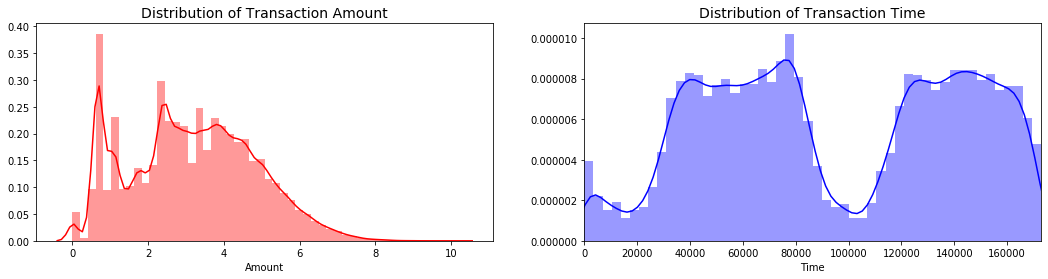

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot((df['Amount']+1).apply(np.log), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
#ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])

sns.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])

In [8]:
#scale the Amount and Time
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [10]:
#seperate the training set and label
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in sss.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [     1      2      3 ... 284802 284804 284805] Test: [     0      6     11 ... 284783 284803 284806]
Train: [     0      2      3 ... 284804 284805 284806] Test: [     1      4     30 ... 284791 284793 284798]
Train: [     0      1      2 ... 284803 284805 284806] Test: [     3     20     21 ... 284781 284799 284804]
Train: [     0      1      3 ... 284803 284804 284806] Test: [     2      7      8 ... 284796 284801 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5      9     10 ... 284797 284800 284802]


In [12]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [13]:
# See if both the train and test label distribution are similarly distributed
train_unique_index, train_counts_index = np.unique(original_ytrain, return_counts=True)
test_unique_index, test_counts_index = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_index/ len(original_ytrain))
print(test_counts_index/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [14]:
#perform the undersample method to deal with the imblanced data
#shuffle the data and create a 50/50 subset
df = df.sample(frac=1)

fraud_df = df[df['Class']==1]
non_fraud_df = df[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
37483,-2.096024,1.328503,0.541098,-1.759920,-1.722872,-1.158568,-0.910801,1.266767,-1.245625,0.036116,...,-0.096836,0.038250,0.359124,0.089542,-0.533472,0.179614,0.076151,0,-0.020960,-0.537107
154694,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,-7.575634,...,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,1,4.540488,0.210646
1480,-1.176271,0.091708,1.551962,1.628364,0.407879,1.468424,0.356669,0.399858,-1.545261,0.568817,...,0.162299,-0.016487,-0.470008,-0.652387,3.463246,-0.090690,-0.050293,0,1.767484,-0.981403
122479,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,-2.921484,-6.561257,...,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1,2.763921,-0.095361
46998,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,-2.961996,...,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,1,2.546915,-0.489479


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 37483 to 6336
Data columns (total 31 columns):
V1               984 non-null float64
V2               984 non-null float64
V3               984 non-null float64
V4               984 non-null float64
V5               984 non-null float64
V6               984 non-null float64
V7               984 non-null float64
V8               984 non-null float64
V9               984 non-null float64
V10              984 non-null float64
V11              984 non-null float64
V12              984 non-null float64
V13              984 non-null float64
V14              984 non-null float64
V15              984 non-null float64
V16              984 non-null float64
V17              984 non-null float64
V18              984 non-null float64
V19              984 non-null float64
V20              984 non-null float64
V21              984 non-null float64
V22              984 non-null float64
V23              984 non-null float64
V24             

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


Text(0.5, 1, 'Balanced Correlation Matrix')

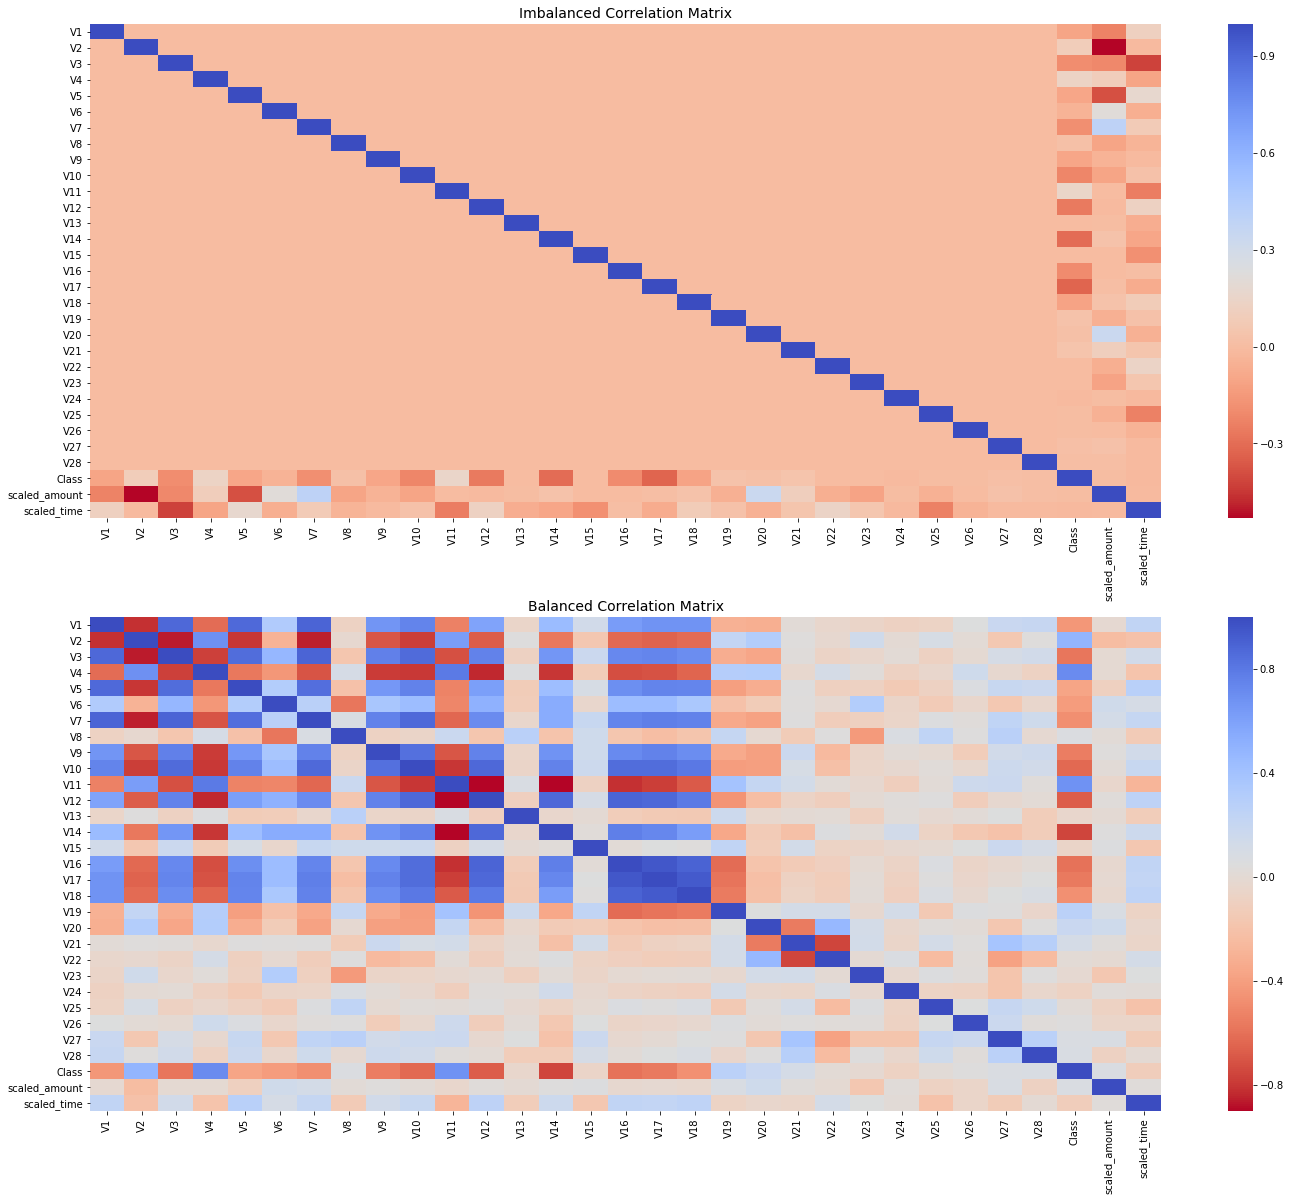

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title("Imbalanced Correlation Matrix", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title("Balanced Correlation Matrix", fontsize=14)

In [18]:
for v in range(1,29):
    print('V'+str(v)+' correlation with Class: '+str(sub_sample_corr['V'+str(v)]['Class']))

V1 correlation with Class: -0.43357742242832553
V2 correlation with Class: 0.4944987529389805
V3 correlation with Class: -0.573983657187588
V4 correlation with Class: 0.7170660065366367
V5 correlation with Class: -0.3677710059476072
V6 correlation with Class: -0.41619728116427257
V7 correlation with Class: -0.47208009926070066
V8 correlation with Class: 0.06996638503589415
V9 correlation with Class: -0.548462676164786
V10 correlation with Class: -0.6287874710674531
V11 correlation with Class: 0.685284189429817
V12 correlation with Class: -0.6760595785238717
V13 correlation with Class: -0.032822359281207115
V14 correlation with Class: -0.7533097332246038
V15 correlation with Class: -0.059117018735419795
V16 correlation with Class: -0.5930958535441313
V17 correlation with Class: -0.5610677969029146
V18 correlation with Class: -0.46792193719982944
V19 correlation with Class: 0.2650924082954687
V20 correlation with Class: 0.18470434639404748
V21 correlation with Class: 0.11173432337921949


- Positive correlated between V1-V28 and Class: V2, V4, V11, V19
- Negative correlated between V1-V28 and Class: V10, V12, V14, V16

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

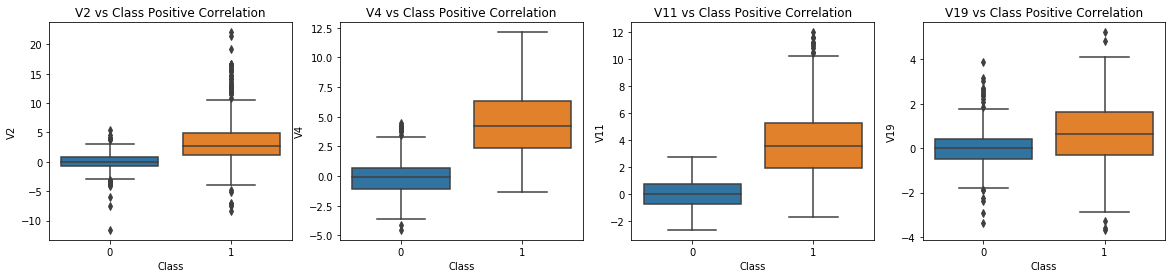

In [19]:
#box plot for the positive correlated features (the higher the feature value, the more likely it will be a fraud transaction)
fig, ax = plt.subplots(1, 4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=new_df, ax=ax[0])
ax[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=ax[1])
ax[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, ax=ax[2])
ax[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, ax=ax[3])
ax[3].set_title('V19 vs Class Positive Correlation')

Text(0.5, 1.0, 'V16 vs Class Negative Correlation')

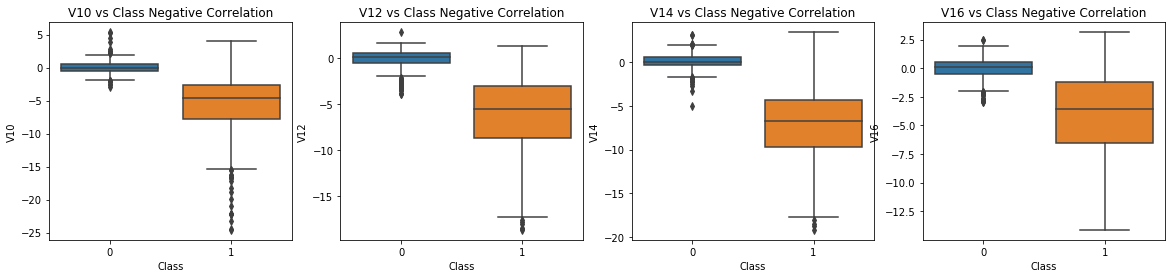

In [20]:
#box plot for the negative correlated features (the lower the feature value, the more likely it will be a fraud transaction)
fig, ax = plt.subplots(1, 4, figsize=(20,4))

sns.boxplot(x="Class", y="V10", data=new_df, ax=ax[0])
ax[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=ax[1])
ax[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=ax[2])
ax[2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, ax=ax[3])
ax[3].set_title('V16 vs Class Negative Correlation')

In [21]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'][new_df['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75- q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V14']>v14_upper) | (new_df['V14']<v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'][new_df['Class']==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'][new_df['Class']==1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
Cut off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.4937733551053, -18.049997689859396, -18.8220867423816]
Number of Instances after outliers removal: 980
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.047596570821604, -18.553697009645802, -18.683714633344298]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outlie

In [63]:
y_new = new_df['Class']
X_new = new_df.drop('Class', axis=1)

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_new.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_new.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_new.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.3 s
PCA took 0.0037 s
Truncated SVD took 0.0029 s


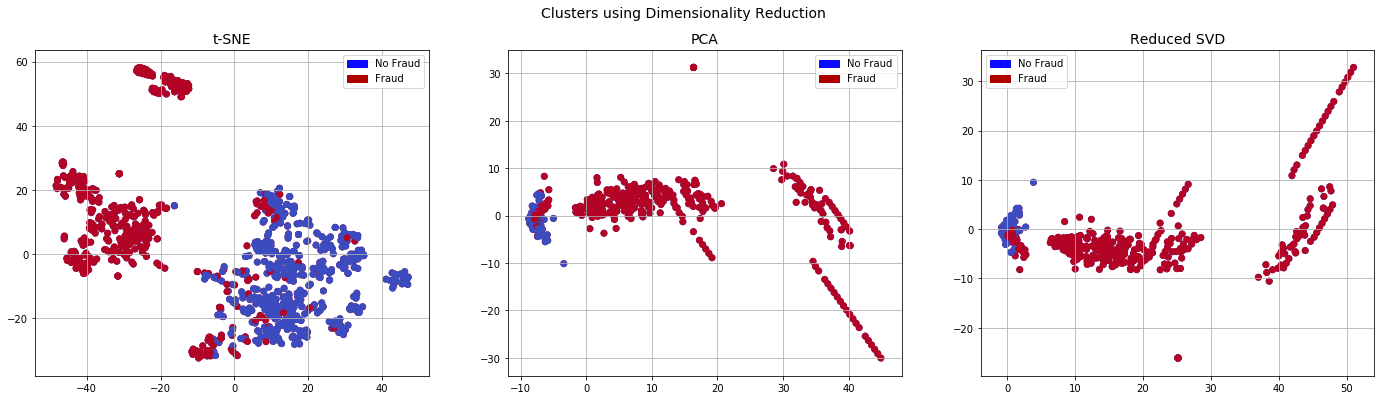

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(24,6))
fig.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_new==0), cmap='coolwarm', label='No Fraud')
ax[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_new==1), cmap='coolwarm', label='Fraud')
ax[0].set_title('t-SNE', fontsize=14)
ax[0].grid(True)
ax[0].legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_new==0), cmap='coolwarm', label = 'No Fraud')
ax[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_new==1), cmap='coolwarm', label = 'Fraud')
ax[1].set_title('PCA', fontsize=14)
ax[1].grid(True)
ax[1].legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax[2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_new==0), cmap='coolwarm', label = 'No Fraud')
ax[2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_new==1), cmap='coolwarm', label = 'Fraud')
ax[2].set_title('Reduced SVD', fontsize=14)
ax[2].grid(True)
ax[2].legend(handles=[blue_patch, red_patch])


In [67]:
#split train and test for the undersampling data
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [68]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [69]:
#define classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [80]:
#implement classifiers
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(),4))

Classifier:  LogisticRegression Has a training score of 0.9405
Classifier:  KNeighborsClassifier Has a training score of 0.9391
Classifier:  SVC Has a training score of 0.926
Classifier:  DecisionTreeClassifier Has a training score of 0.918


In [77]:
#parameters tuning

#Logistic Regression parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

#K nearest parameters
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

#SVC parameters
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [79]:
#training cross val score after tuning classifiers
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean(), 4))


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean(), 4))

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean(), 4))

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean(), 4))

Logistic Regression Cross Validation Score:  0.9445
Knears Neighbors Cross Validation Score 0.9391
Support Vector Classifier Cross Validation Score 0.9431
DecisionTree Classifier Cross Validation Score 0.9273


In [99]:
#we need to use different measurement like auc-roc since the data is imblanced
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [100]:
print('Logistic Regression roc_auc: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors roc_auc: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier roc_auc: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier roc_auc: ', roc_auc_score(y_train, tree_pred))

Logistic Regression roc_auc:  0.9424297402561013
KNears Neighbors roc_auc:  0.9360237047829864
Support Vector Classifier roc_auc:  0.9408676342850739
Decision Tree Classifier roc_auc:  0.9259050407688644


In [86]:
#let's take a deeper look at the logistic regression classifier
#precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [105]:
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, log_reg_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, log_reg_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, log_reg_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, log_reg_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------


In [106]:
log_reg_pred_original = cross_val_predict(log_reg, original_Xtrain, original_ytrain, cv=5)

knears_pred_original = cross_val_predict(knears_neighbors, original_Xtrain, original_ytrain, cv=5)

svc_pred_original = cross_val_predict(svc, original_Xtrain, original_ytrain, cv=5)

tree_pred_original = cross_val_predict(tree_clf, original_Xtrain, original_ytrain, cv=5)

In [107]:
print('Logistic Regression roc_auc on original set: ', roc_auc_score(original_ytrain, log_reg_pred_original))
print('KNears Neighbors roc_auc on original set: ', roc_auc_score(original_ytrain, knears_pred_original))
print('Support Vector Classifier roc_auc on original set: ', roc_auc_score(original_ytrain, svc_pred_original))
print('Decision Tree Classifier roc_auc on original set: ', roc_auc_score(original_ytrain, tree_pred_original))

Logistic Regression roc_auc on original set:  0.8082877038774555
KNears Neighbors roc_auc on original set:  0.8374711246043233
Support Vector Classifier roc_auc on original set:  0.8551694758200111
Decision Tree Classifier roc_auc on original set:  0.8488550738791455


In [108]:
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(original_ytrain, log_reg_pred_original)))
print('Precision Score: {:.2f}'.format(precision_score(original_ytrain, log_reg_pred_original)))
print('F1 Score: {:.2f}'.format(f1_score(original_ytrain, log_reg_pred_original)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(original_ytrain, log_reg_pred_original)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.62
Precision Score: 0.86
F1 Score: 0.72
Accuracy Score: 1.00
---------------------------------------------------------------------------------------------------------------------------------------


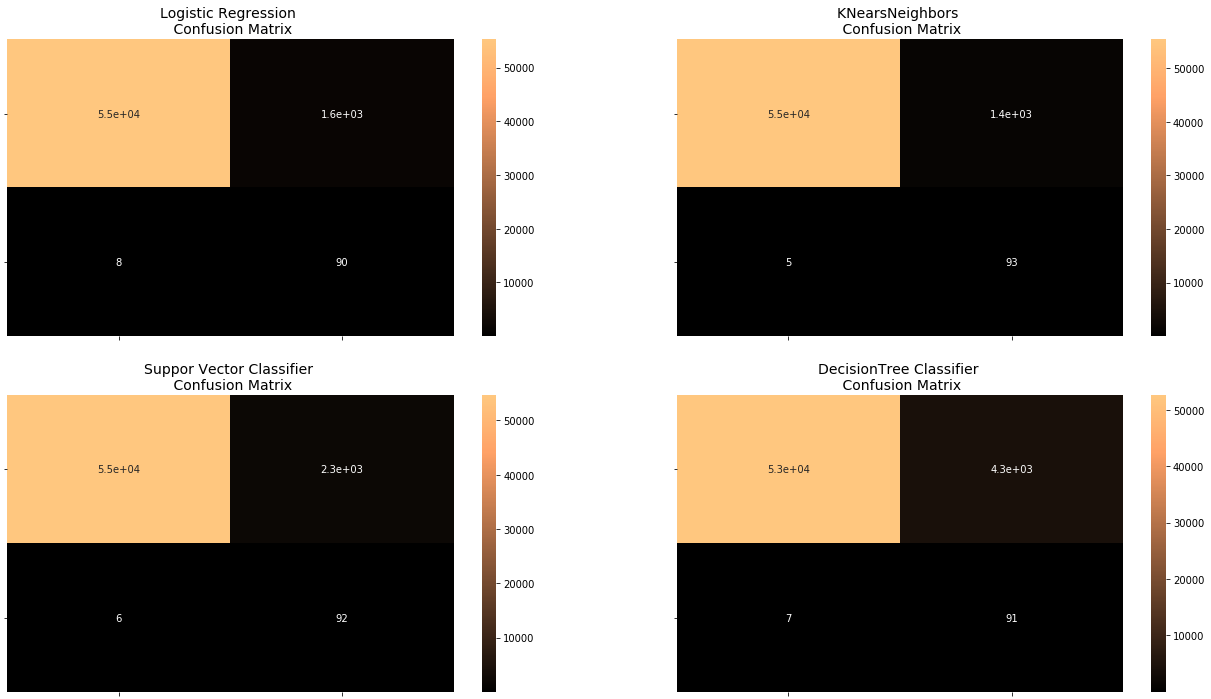

In [112]:

# Other models fitted with UnderSampling
y_pred_log_reg = log_reg.predict(original_Xtest)
y_pred_knear = knears_neighbors.predict(original_Xtest)
y_pred_svc = svc.predict(original_Xtest)
y_pred_tree = tree_clf.predict(original_Xtest)


log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg)
kneighbors_cf = confusion_matrix(original_ytest, y_pred_knear)
svc_cf = confusion_matrix(original_ytest, y_pred_svc)
tree_cf = confusion_matrix(original_ytest, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show() 

In [114]:
#summary for all classifiers

print('Logistic Regression:')
print(classification_report(original_ytest, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(original_ytest, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(original_ytest, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(original_ytest, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.94      0.54     56961
weighted avg       1.00      0.97      0.98     56961

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.06      0.95      0.11        98

    accuracy                           0.97     56961
   macro avg       0.53      0.96      0.55     56961
weighted avg       1.00      0.97      0.99     56961

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.94      0.08        98

    accuracy                           0.96     56961
   macro avg       0.52      0.95      0.53     56961
weighted

In [119]:
#implement the NN
n_inputs = original_Xtrain.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])

W0719 14:13:35.500961 4641535424 deprecation_wrapper.py:119] From /miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 14:13:35.533678 4641535424 deprecation_wrapper.py:119] From /miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 14:13:35.546672 4641535424 deprecation_wrapper.py:119] From /miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [120]:
undersample_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [121]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

W0719 14:15:53.384816 4641535424 deprecation_wrapper.py:119] From /miniconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 14:15:53.389136 4641535424 deprecation_wrapper.py:119] From /miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [122]:
undersample_model.fit(original_Xtrain, original_ytrain, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

W0719 14:16:21.599174 4641535424 deprecation.py:323] From /miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0719 14:16:21.626560 4641535424 deprecation_wrapper.py:119] From /miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 182276 samples, validate on 45570 samples
Epoch 1/20
 - 6s - loss: 0.0070 - acc: 0.9988 - val_loss: 0.0031 - val_acc: 0.9996
Epoch 2/20
 - 6s - loss: 0.0033 - acc: 0.9993 - val_loss: 0.0029 - val_acc: 0.9995
Epoch 3/20
 - 6s - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0033 - val_acc: 0.9995
Epoch 4/20
 - 6s - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0030 - val_acc: 0.9995
Epoch 5/20
 - 6s - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0035 - val_acc: 0.9995
Epoch 6/20
 - 6s - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 7/20
 - 6s - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0031 - val_acc: 0.9995
Epoch 8/20
 - 6s - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 9/20
 - 6s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0038 - val_acc: 0.9995
Epoch 10/20
 - 6s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 11/20
 - 6s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0044 - val_acc: 0.9996
Epoch 12/20
 - 6s - loss: 0.0019 -

In [123]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [125]:
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [134]:
print(classification_report(original_ytest, undersample_fraud_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56961
   macro avg       0.94      0.92      0.93     56961
weighted avg       1.00      1.00      1.00     56961

